## Data Understanding

### Data Source

Data yang digunakan bersumber dari transaksi penjualan Nichoa

### Data Dictionary

- order_no : nomor order tiap customer
- order_time : tanggal dan waktu tiap customer melakukan pemesanan
- qty : jumlah barang yang dipesan
- price : total harga barang yang dipesan

## Data Preparation

### Import Library
Menggunakan beberapa library yang digunakan untuk melakukan pemodelan RFM & K-Means Clustering

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

### Data Profiling
load dataset dari spreadsheet dan menampilkan 5 baris teratas dataset tersebut

In [56]:
sheet_id = '1-rPoksqtegeqEkaFvGGMlpcFqfxx1gai-SicUizB4q4'
xls = pd.ExcelFile(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx')

df = pd.read_excel(xls, 'Dataset')

df.head(30)

,order_no,order_time,qty,price
0,065321010200000076,2021-01-02 15:18:40,1.0,10000.0
1,065321010200000076,2021-01-02 15:18:40,1.0,10000.0
2,065321010600000078,2021-01-06 15:28:17,1.0,10000.0
3,065321010600000078,2021-01-06 15:28:17,1.0,10000.0
4,065321010800000080,2021-01-08 09:39:05,1.0,10000.0
5,065321010800000082,2021-01-08 09:46:16,10.0,10000.0
6,065321010800000082,2021-01-08 09:46:16,10.0,10000.0
7,065321010800000085,2021-01-08 15:55:22,5.0,10000.0
8,065321010800000085,2021-01-08 15:55:22,5.0,10000.0
9,065321011100000088,2021-01-11 10:17:06,1.0,10000.0


Menampilkan informasi mengenai dataset yang digunakan seperti nama kolom, tipe data dan jumlah baris 

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_no    457 non-null    object        
 1   order_time  457 non-null    datetime64[ns]
 2   qty         457 non-null    float64       
 3   price       457 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 14.4+ KB


### Data Cleansing

Mengubah tipe data pada kolom **qty**, **price** menjadi tipe data int

In [58]:
df[['qty', 'price']] = df[['qty', 'price']].astype(float).astype(int)

In [59]:
df.head(10)

,order_no,order_time,qty,price
0,065321010200000076,2021-01-02 15:18:40,1,10000
1,065321010200000076,2021-01-02 15:18:40,1,10000
2,065321010600000078,2021-01-06 15:28:17,1,10000
3,065321010600000078,2021-01-06 15:28:17,1,10000
4,065321010800000080,2021-01-08 09:39:05,1,10000
5,065321010800000082,2021-01-08 09:46:16,10,10000
6,065321010800000082,2021-01-08 09:46:16,10,10000
7,065321010800000085,2021-01-08 15:55:22,5,10000
8,065321010800000085,2021-01-08 15:55:22,5,10000
9,065321011100000088,2021-01-11 10:17:06,1,10000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_no    457 non-null    object        
 1   order_time  457 non-null    datetime64[ns]
 2   qty         457 non-null    int32         
 3   price       457 non-null    int32         
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 10.8+ KB


Membuat kolom baru untuk memisahkan data pada kolom **order_time**

In [61]:
df['year-month'] = df['order_time'].dt.strftime('%Y-%m')
df['year'] = df['order_time'].dt.strftime('%Y')
df['month'] = df['order_time'].dt.strftime('%m')
df['date'] = df['order_time'].dt.strftime('%d')

In [62]:
df.head()

,order_no,order_time,qty,price,year-month,year,month,date
0,065321010200000076,2021-01-02 15:18:40,1,10000,2021-01,2021,01,02
1,065321010200000076,2021-01-02 15:18:40,1,10000,2021-01,2021,01,02
2,065321010600000078,2021-01-06 15:28:17,1,10000,2021-01,2021,01,06
3,065321010600000078,2021-01-06 15:28:17,1,10000,2021-01,2021,01,06
4,065321010800000080,2021-01-08 09:39:05,1,10000,2021-01,2021,01,08


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_no    457 non-null    object        
 1   order_time  457 non-null    datetime64[ns]
 2   qty         457 non-null    int32         
 3   price       457 non-null    int32         
 4   year-month  457 non-null    object        
 5   year        457 non-null    object        
 6   month       457 non-null    object        
 7   date        457 non-null    object        
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 25.1+ KB


### Exploratory Data Analysis

**Menampilkan penjualan tiap bulan**

In [64]:
df_monthly = df.groupby(['year-month']).qty.sum()
df_monthly = pd.DataFrame(df_monthly)
df_monthly = df_monthly.reset_index()

df_monthly

,year-month,qty
0,2021-01,100
1,2021-02,140
2,2021-03,176
3,2021-04,79
4,2021-05,103
5,2021-07,50
6,2021-08,230
7,2021-09,32
8,2021-10,240
9,2021-11,134


In [65]:
# cek total qty

df_monthly['qty'].sum()

1529

In [66]:
# membuat grafik penjualan energy bar tiap bulan

plot_order = [
    go.Scatter(
        x = df_monthly['year-month'],
        y = df_monthly['qty'],
        mode = 'lines+markers'
    )
]

plot_layout = go.Layout(
    xaxis = {'type' : 'category'},
    xaxis_title = 'Bulan',
    yaxis_title = 'Jumlah',
    title = 'Penjualan Energy Bar di Bulan Januari 2021 - Februari 2022'
)

fig = go.Figure(data=plot_order, layout=plot_layout)
pyoff.iplot(fig)

In [67]:
df_month = df.groupby(['year','month']).qty.sum()
df_month = pd.DataFrame(df_month)
df_month = df_month.reset_index()
df_month['percentage'] = round(df_month['qty'].pct_change()*100, 2)

df_month

,year,month,qty,percentage
0,2021,01,100,NaN
1,2021,02,140,40.00
2,2021,03,176,25.71
3,2021,04,79,-55.11
4,2021,05,103,30.38
5,2021,07,50,-51.46
6,2021,08,230,360.00
7,2021,09,32,-86.09
8,2021,10,240,650.00
9,2021,11,134,-44.17


In [68]:
df_month['month'] = df_month['month'].replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], 
                                  ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

df_month

,year,month,qty,percentage
0,2021,Jan,100,NaN
1,2021,Feb,140,40.00
2,2021,Mar,176,25.71
3,2021,Apr,79,-55.11
4,2021,Mei,103,30.38
5,2021,Jul,50,-51.46
6,2021,Agu,230,360.00
7,2021,Sep,32,-86.09
8,2021,Okt,240,650.00
9,2021,Nov,134,-44.17


In [69]:
fig = px.bar(df_month, x='month', y='qty', color='year', text='percentage')
pyoff.iplot(fig)

**Menghitung revenue**

In [70]:
df['revenue'] = df['qty'] * df['price']

df.head()

,order_no,order_time,qty,price,year-month,year,month,date,revenue
0,065321010200000076,2021-01-02 15:18:40,1,10000,2021-01,2021,01,02,10000
1,065321010200000076,2021-01-02 15:18:40,1,10000,2021-01,2021,01,02,10000
2,065321010600000078,2021-01-06 15:28:17,1,10000,2021-01,2021,01,06,10000
3,065321010600000078,2021-01-06 15:28:17,1,10000,2021-01,2021,01,06,10000
4,065321010800000080,2021-01-08 09:39:05,1,10000,2021-01,2021,01,08,10000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_no    457 non-null    object        
 1   order_time  457 non-null    datetime64[ns]
 2   qty         457 non-null    int32         
 3   price       457 non-null    int32         
 4   year-month  457 non-null    object        
 5   year        457 non-null    object        
 6   month       457 non-null    object        
 7   date        457 non-null    object        
 8   revenue     457 non-null    int32         
dtypes: datetime64[ns](1), int32(3), object(5)
memory usage: 26.9+ KB


In [72]:
df_revenue = df.groupby(['year-month']).revenue.sum()
df_revenue = pd.DataFrame(df_revenue)
df_revenue = df_revenue.reset_index()
df_revenue['percentage'] = round(df_revenue['revenue'].pct_change()*100, 2)

df_revenue

,year-month,revenue,percentage
0,2021-01,1000000,NaN
1,2021-02,1400000,40.00
2,2021-03,1760000,25.71
3,2021-04,790000,-55.11
4,2021-05,1030000,30.38
5,2021-07,500000,-51.46
6,2021-08,2300000,360.00
7,2021-09,320000,-86.09
8,2021-10,2400000,650.00
9,2021-11,1340000,-44.17


In [73]:
# membuat grafik revenue energy bar tiap bulan

plot_order = [
    go.Scatter(
        x = df_revenue['year-month'],
        y = df_revenue['revenue'],
        mode = 'lines+markers'
    )
]

plot_layout = go.Layout(
    xaxis = {'type' : 'category'},
    xaxis_title = 'Bulan',
    yaxis_title = 'Revenue',
    title = 'Revenue Energy Bar di Bulan Januari 2021 - Februari 2022'
)

fig = go.Figure(data=plot_order, layout=plot_layout)
pyoff.iplot(fig)

### Preprocessing Data 

In [74]:
# timebound

print(df['order_time'].min())
print(df['order_time'].max())

2021-01-02 15:18:40
2022-02-24 16:08:23


In [75]:
now = dt.date(2022, 2, 24)
df['Date'] = pd.DatetimeIndex(df.order_time).date

In [76]:
# Recency
df_recency = df.groupby(['order_no'],as_index=False)['Date'].max()
df_recency.columns = ['order_no','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(now - x).days)
# df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,order_no,Last_Purchase_Date,Recency
0,065321010200000076,2021-01-02,418
1,065321010600000078,2021-01-06,414
2,065321010800000080,2021-01-08,412
3,065321010800000082,2021-01-08,412
4,065321010800000085,2021-01-08,412


In [77]:
# Frequency & Monetary
df_fm = df.groupby('order_no').agg({'order_no':lambda x:len(x),
                                    'price':lambda x:sum(x)})
df_fm.rename(columns = {'order_no' :'Frequency',
                        'price':'Monetary'},inplace= True)
df_fm.head()

,Frequency,Monetary
order_no,,
065321010200000076,2,20000
065321010600000078,2,20000
065321010800000080,1,10000
065321010800000082,2,20000
065321010800000085,2,20000


In [78]:
df_fm.describe()

,Frequency,Monetary
count,260.000000,260.000000
mean,1.757692,17576.923077
std,0.429306,4293.058750
min,1.000000,10000.000000
25%,2.000000,20000.000000
50%,2.000000,20000.000000
75%,2.000000,20000.000000
max,2.000000,20000.000000


In [86]:
RFM_Table = df_recency.merge(df_fm,left_on='order_no',right_on='order_no')
RFM_Table.head()

,order_no,Last_Purchase_Date,Recency,Frequency,Monetary
0,065321010200000076,2021-01-02,418,2,20000
1,065321010600000078,2021-01-06,414,2,20000
2,065321010800000080,2021-01-08,412,1,10000
3,065321010800000082,2021-01-08,412,2,20000
4,065321010800000085,2021-01-08,412,2,20000


In [80]:
df_rfm = RFM_Table.copy()

In [81]:
df_rfm = df_rfm.drop(['order_no', 'Last_Purchase_Date'], axis=1)
df_rfm.head()

,Recency,Frequency,Monetary
0,418,2,20000
1,414,2,20000
2,412,1,10000
3,412,2,20000
4,412,2,20000


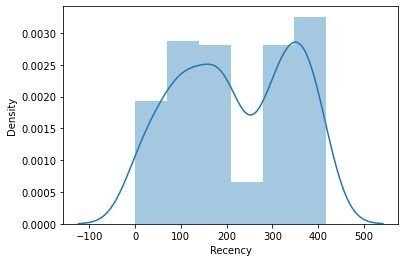

In [82]:
sns.distplot(df_rfm['Recency']);

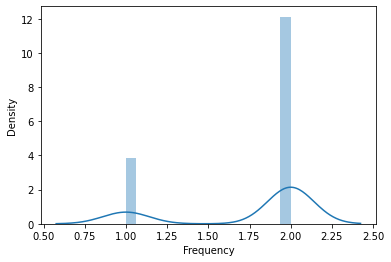

In [83]:
sns.distplot(df_rfm['Frequency']);

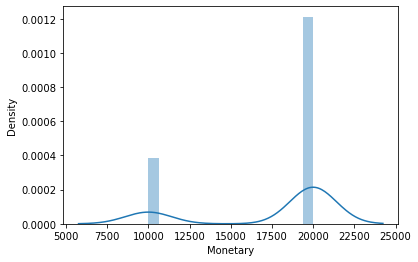

In [85]:
sns.distplot(df_rfm['Monetary']);

In [28]:
df_rfm_new = df_rfm.copy()

In [29]:
df_rfm_new = np.log(df_rfm_new+1)

In [30]:
windsoriser = Winsorizer(tail='both',
                         fold=2,
                         variables=['Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_new)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [31]:
df_rfm_new = windsoriser.transform(df_rfm_new)

In [32]:
scaler = StandardScaler()
scaler.fit(df_rfm_new)
df_rfm_scaled = scaler.transform(df_rfm_new)

In [33]:
df_rfm_scaled = pd.DataFrame(df_rfm_scaled, columns=df_rfm.columns)
df_rfm_scaled.head()

,Recency,Frequency,Monetary
0,1.063250,0.565506,0.565506
1,1.051733,0.565506,0.565506
2,1.045933,-1.768328,-1.768328
3,1.045933,0.565506,0.565506
4,1.045933,0.565506,0.565506


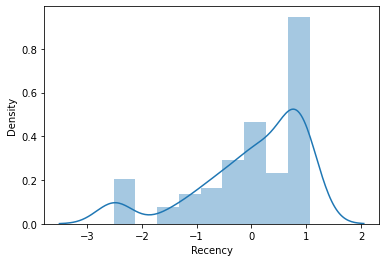

In [88]:
sns.distplot(df_rfm_scaled['Recency']);

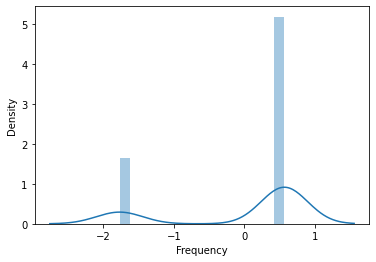

In [87]:
sns.distplot(df_rfm_scaled['Frequency']);

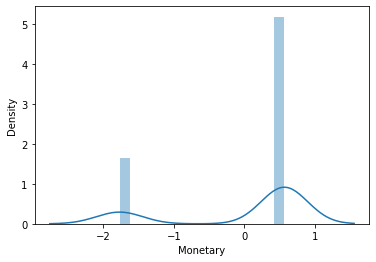

In [89]:
sns.distplot(df_rfm_scaled['Monetary']);

In [34]:
X = np.asarray(df_rfm_scaled)

## Modeling

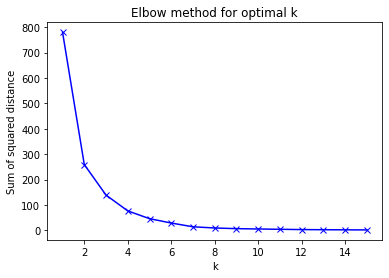

In [35]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method for optimal k')
plt.show()

In [36]:
model_kmeans_2 = KMeans(n_clusters = 2)
model_kmeans_2.fit(X)

print(model_kmeans_2.cluster_centers_)

[[ 0.03179636  0.56550593  0.56550593]
 [-0.09942671 -1.76832806 -1.76832806]]


In [37]:
model_kmeans_3 = KMeans(n_clusters = 3)
model_kmeans_3.fit(X)

print(model_kmeans_3.cluster_centers_)

[[ 0.48753721  0.56550593  0.56550593]
 [-0.09942671 -1.76832806 -1.76832806]
 [-1.30808176  0.56550593  0.56550593]]


In [38]:
model_kmeans_4 = KMeans(n_clusters = 4)
model_kmeans_4.fit(X)

print(model_kmeans_4.cluster_centers_)

[[-1.11625591  0.56550593  0.56550593]
 [ 0.45581508 -1.76832806 -1.76832806]
 [ 0.55904999  0.56550593  0.56550593]
 [-1.87620041 -1.76832806 -1.76832806]]


In [39]:
model_kmeans_5 = KMeans(n_clusters = 5)
model_kmeans_5.fit(X)

print(model_kmeans_5.cluster_centers_)

[[ 0.78304805  0.56550593  0.56550593]
 [ 0.45581508 -1.76832806 -1.76832806]
 [-1.90380224  0.56550593  0.56550593]
 [-1.87620041 -1.76832806 -1.76832806]
 [-0.22726852  0.56550593  0.56550593]]


In [40]:
# evaluate

In [41]:
print(davies_bouldin_score(X, model_kmeans_2.labels_))

0.5096845476285682


In [42]:
print(davies_bouldin_score(X, model_kmeans_3.labels_))

0.5261278283242826


In [43]:
print(davies_bouldin_score(X, model_kmeans_4.labels_))

0.5423123082328687


In [44]:
print(davies_bouldin_score(X, model_kmeans_5.labels_))

0.5182339816893646


## Deployment

In [45]:
# labeling
df_clustered = pd.DataFrame(df_rfm)
df_clustered['cluster'] = pd.DataFrame(model_kmeans_5.labels_)
df_clustered = df_clustered.sort_values('cluster')
data_clustered = np.asarray(df_clustered)

data_clustered

array([[  418,     2, 20000,     0],
       [  310,     2, 20000,     0],
       [  366,     2, 20000,     0],
       ...,
       [  132,     2, 20000,     4],
       [  132,     2, 20000,     4],
       [  138,     2, 20000,     4]], dtype=int64)

In [90]:
df_clustered

,Recency,Frequency,Monetary,cluster
0,418,2,20000,0
203,310,2,20000,0
167,366,2,20000,0
204,301,2,20000,0
205,301,2,20000,0
...,...,...,...,...
77,133,2,20000,4
78,132,2,20000,4
79,132,2,20000,4
81,132,2,20000,4


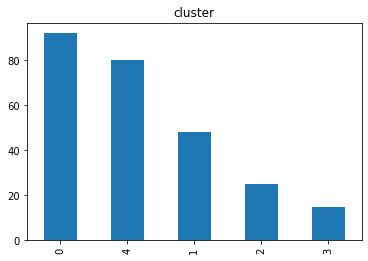

In [47]:
df_clustered['cluster'].value_counts().plot(kind='bar');
plt.title('cluster');

In [100]:
cluster_0 = df_clustered.loc[df_clustered['cluster'] == 0]

cluster_0

,Recency,Frequency,Monetary,cluster
0,418,2,20000,0
203,310,2,20000,0
167,366,2,20000,0
204,301,2,20000,0
205,301,2,20000,0
...,...,...,...,...
144,386,2,20000,0
137,367,2,20000,0
142,390,2,20000,0
141,390,2,20000,0


In [102]:
cluster_1 = df_clustered.loc[df_clustered['cluster'] == 1]

cluster_1

,Recency,Frequency,Monetary,cluster
162,369,1,10000,1
143,390,1,10000,1
163,369,1,10000,1
155,374,1,10000,1
148,380,1,10000,1
138,367,1,10000,1
134,406,1,10000,1
135,406,1,10000,1
173,355,1,10000,1
172,355,1,10000,1


In [103]:
cluster_2 = df_clustered.loc[df_clustered['cluster'] == 2]

cluster_2

,Recency,Frequency,Monetary,cluster
256,0,2,20000,2
255,2,2,20000,2
252,5,2,20000,2
251,5,2,20000,2
250,7,2,20000,2
249,7,2,20000,2
247,13,2,20000,2
245,14,2,20000,2
243,17,2,20000,2
237,21,2,20000,2


In [104]:
cluster_3 = df_clustered.loc[df_clustered['cluster'] == 3]

cluster_3

,Recency,Frequency,Monetary,cluster
236,27,1,10000,3
238,21,1,10000,3
239,21,1,10000,3
240,21,1,10000,3
132,48,1,10000,3
242,21,1,10000,3
244,15,1,10000,3
246,14,1,10000,3
254,2,1,10000,3
241,21,1,10000,3


In [105]:
cluster_4 = df_clustered.loc[df_clustered['cluster'] == 4]

cluster_4

,Recency,Frequency,Monetary,cluster
110,79,2,20000,4
235,156,2,20000,4
40,198,2,20000,4
233,163,2,20000,4
232,163,2,20000,4
...,...,...,...,...
77,133,2,20000,4
78,132,2,20000,4
79,132,2,20000,4
81,132,2,20000,4


In [106]:
cluster_0.shape

(92, 4)

In [107]:
cluster_1.shape

(48, 4)

In [108]:
cluster_2.shape

(25, 4)

In [109]:
cluster_3.shape

(15, 4)

In [110]:
cluster_4.shape

(80, 4)